In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

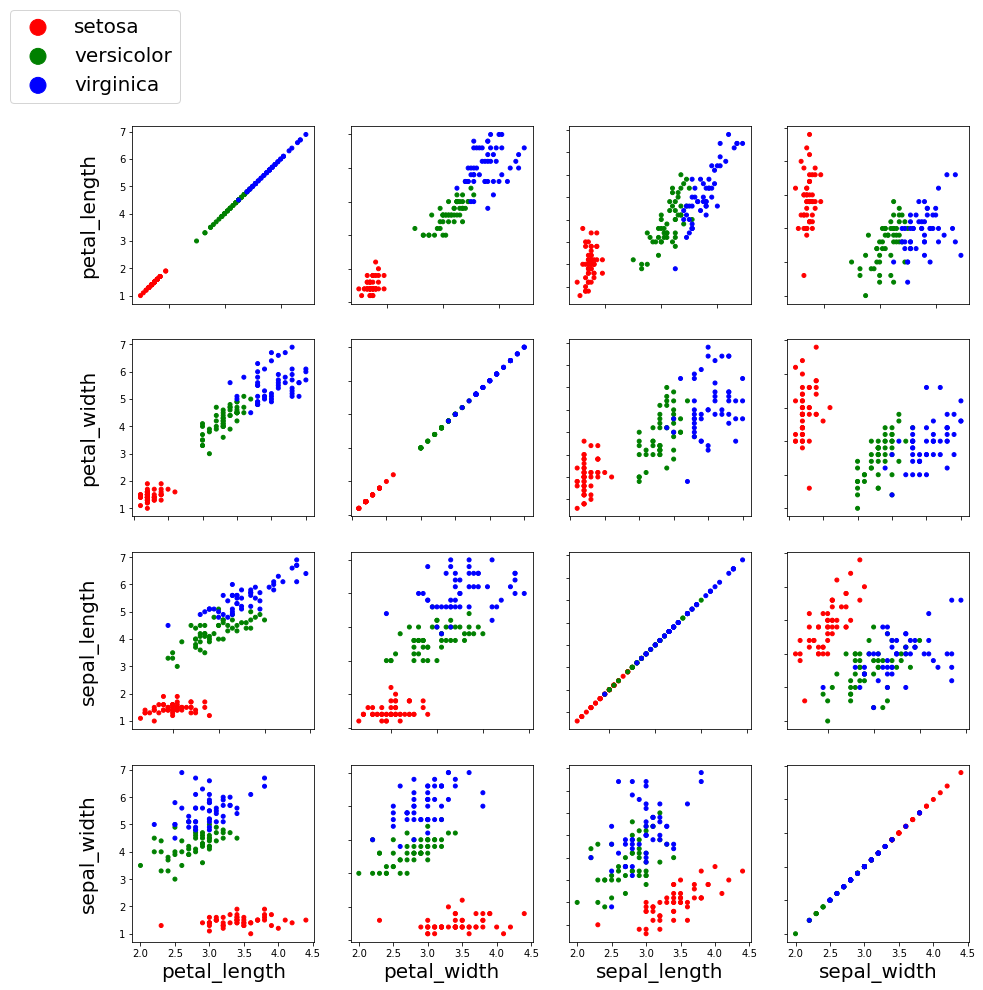

In [120]:
# Original dataset as a dataframe
iris_original = pd.read_csv('../data/iris_original.csv')

# In case we need ndarray of data
labels = iris_original['species'].to_numpy() # array of string labels
keys = iris_original.columns.values[:-1] # array of string column variable names
data = iris_original.drop('species', axis=1).to_numpy() # all data without labels (petal_length, petal_width, sepal_length, sepal_width)

# Plot data
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

values, indices, counts = np.unique(labels, return_inverse=True, return_counts=True)
colors = ['r','g','b']
for rowidx, row in enumerate(ax):
    for colidx, col in enumerate(row):
        for label, df in iris_original.groupby('species'):
            label_idx = np.where(values==label)[0][0]
            col.scatter(df.iloc[:,rowidx], df.iloc[:,colidx], c=counts[label_idx]*[colors[label_idx]], s=16, label=label)
        col.set_xlabel(iris_original.columns[colidx], fontsize=20)
        col.set_ylabel(iris_original.columns[rowidx], labelpad=20, fontsize=20)
        col.label_outer()
# for axis in ax.flat:
#     axis.set(xlabel='x-axis', ylabel='y axis')
#     axis.label_outer()
handles, lbls = plt.gca().get_legend_handles_labels()
fig.legend(handles, lbls, loc='upper left', fontsize=20, markerscale=4)
plt.show()

In [124]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)
x_train

array([[3.9, 1.2, 5.8, 2.7],
       [1.6, 0.4, 5. , 3.4],
       [4. , 1.3, 6.1, 2.8],
       [6.3, 1.8, 7.3, 2.9],
       [4.5, 1.5, 6.4, 3.2],
       [4.2, 1.5, 5.9, 3. ],
       [4. , 1.3, 5.5, 2.3],
       [1.5, 0.4, 5.4, 3.4],
       [1.3, 0.2, 5.5, 3.5],
       [4.9, 1.5, 6.3, 2.5],
       [4.2, 1.2, 5.7, 3. ],
       [5.7, 2.3, 6.9, 3.2],
       [4.4, 1.4, 6.6, 3. ],
       [1.3, 0.2, 4.4, 3.2],
       [4.6, 1.4, 6.1, 3. ],
       [5.7, 2.5, 6.7, 3.3],
       [1.6, 0.2, 5. , 3. ],
       [5. , 1.5, 6. , 2.2],
       [4.8, 1.8, 5.9, 3.2],
       [6.7, 2. , 7.7, 2.8],
       [4.5, 1.3, 5.7, 2.8],
       [6.1, 2.3, 7.7, 3. ],
       [1.4, 0.3, 4.6, 3.4],
       [1.9, 0.2, 4.8, 3.4],
       [5.5, 1.8, 6.4, 3.1],
       [4.7, 1.5, 6.7, 3.1],
       [5.6, 1.8, 6.3, 2.9],
       [5.9, 2.1, 7.1, 3. ],
       [1.7, 0.3, 5.7, 3.8],
       [4. , 1.2, 5.8, 2.6],
       [4.4, 1.4, 6.7, 3.1],
       [6. , 1.8, 7.2, 3.2],
       [5.8, 1.6, 7.2, 3. ],
       [5.1, 1.8, 5.9, 3. ],
       [1.4, 0

In [128]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf.fit(x_train, y_train)
print(f'{round(clf.score(x_test, y_test), 4)*100}% accuracy on neural network')

93.33% accuracy on neural network
